# **Diabetic Patient Readmission -- EDA**

This dataset was analyzed by numerous Virginia Commonwealth University faculty in a recent research article which is accompanied by feature descriptions. These can be found at https://www.hindawi.com/journals/bmri/2014/781670/tab1/.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df1 = pd.read_csv('clean_data.csv')
df2 = pd.read_excel('CMS32_DESC_LONG_SHORT_DX.xlsx') #ICD9 diagnoses codes with descriptions

In [3]:
df1.keys()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df1.head(8).T

,0,1,2,3,4,5,6,7
encounter_id,2278392,149190,500364,16680,35754,55842,63768,12522
patient_nbr,8222157,55629189,82442376,42519267,82637451,84259809,114882984,48330783
race,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male,Male,Male,Female
age,[0-10),[10-20),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90)
admission_type_id,6,1,1,1,2,3,1,2
discharge_disposition_id,25,1,1,1,1,1,1,1
admission_source_id,1,7,7,7,2,2,7,4
time_in_hospital,1,3,2,1,3,4,5,13
medical_specialty,Pediatrics-Endocrinology,missing,missing,missing,missing,missing,missing,missing


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,64781.0,1.667968e+08,1.025652e+08,12522.0,90241104.0,152553054.0,232089444.0,443867222.0
patient_nbr,64781.0,5.553382e+07,3.949411e+07,135.0,23639148.0,47350917.0,88149285.0,189502619.0
admission_type_id,64781.0,2.071719e+00,1.476014e+00,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,64781.0,3.013337e+00,4.599939e+00,1.0,1.0,1.0,3.0,28.0
admission_source_id,64781.0,5.689878e+00,4.168131e+00,1.0,1.0,7.0,7.0,25.0
time_in_hospital,64781.0,4.171362e+00,2.876314e+00,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,64781.0,4.254632e+01,2.009113e+01,1.0,30.0,44.0,57.0,132.0
num_procedures,64781.0,1.418286e+00,1.764538e+00,0.0,0.0,1.0,2.0,6.0
num_medications,64781.0,1.561240e+01,8.269618e+00,1.0,10.0,14.0,20.0,81.0
number_outpatient,64781.0,2.836171e-01,1.074359e+00,0.0,0.0,0.0,0.0,42.0


**More cleaning notes:**<br><br>
UCI Machine Learning Repository Link: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008<br><br>
Dataset information provided on the UCI website:<br><br>
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.<br><br>
(1) It is an inpatient encounter (a hospital admission).<br>
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.<br>
(3) The length of stay was at least 1 day and at most 14 days.<br>
(4) Laboratory tests were performed during the encounter.<br>
(5) Medications were administered during the encounter.<br><br>
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [6]:
df2.sample(10)

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION
14261,V641,Surgical or other procedure not carried out be...,No proc/contraindication
11205,9251,Crushing injury of face and scalp,Crush inj face scalp
9229,78060,"Fever, unspecified",Fever NOS
11812,9723,Poisoning by ganglion-blocking agents,Pois-ganglion block agt
10754,86809,Injury to other and multiple intra-abdominal o...,Intra-abdom inj NEC-clos
4457,3829,Unspecified otitis media,Otitis media NOS
11083,9110,"Abrasion or friction burn of trunk, without me...",Abrasion trunk
4704,41419,Other aneurysm of heart,Aneurysm of heart NEC
8501,7395,"Nonallopathic lesions, pelvic region",Somat dysfunc pelvic reg
6067,6014,Prostatitis in diseases classified elsewhere,Prostatitis in oth dis


In [7]:
print('diag_1:', df2['DIAGNOSIS CODE'].isin(df1.diag_1).sum(), 'matches out of', df1.diag_1.nunique())
print('diag_2:', df2['DIAGNOSIS CODE'].isin(df1.diag_2).sum(), 'matches out of', df1.diag_2.nunique())
print('diag_3:', df2['DIAGNOSIS CODE'].isin(df1.diag_3).sum(), 'matches out of', df1.diag_3.nunique())

diag_1: 47 matches out of 684
diag_2: 51 matches out of 723
diag_3: 53 matches out of 746


**Noted in the article: The initial dataset was extracted under the stipulation that the patient has *some record* of a diabetes mellitus diagnosis (ICD9: 250.xx) recorded in hospitals' Electronic Health Records (EHR).**

In [8]:
df1_numeric = df1[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_diagnoses']]
df1_numeric.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
time_in_hospital,1,3,2,1,3,4,5,13,12,9,7,7,10,1,12
num_lab_procedures,41,59,44,51,31,70,73,68,33,47,62,60,55,49,75
num_procedures,0,0,1,0,6,1,0,2,3,2,0,0,1,5,5
num_medications,1,18,16,8,16,21,12,28,18,17,11,15,31,2,13
number_outpatient,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
number_emergency,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
number_diagnoses,1,9,7,5,9,7,8,8,8,9,7,8,8,8,9


In [9]:
df1_cats = df1.drop(columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_diagnoses'])
df1_cats.head(8).T

,0,1,2,3,4,5,6,7
encounter_id,2278392,149190,500364,16680,35754,55842,63768,12522
patient_nbr,8222157,55629189,82442376,42519267,82637451,84259809,114882984,48330783
race,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male,Male,Male,Female
age,[0-10),[10-20),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90)
admission_type_id,6,1,1,1,2,3,1,2
discharge_disposition_id,25,1,1,1,1,1,1,1
admission_source_id,1,7,7,7,2,2,7,4
medical_specialty,Pediatrics-Endocrinology,missing,missing,missing,missing,missing,missing,missing
diag_1,250.83,276,8,197,414,414,428,398


In [10]:
yes_hba1c = df1[df1.A1Cresult != 'None']
yes_hba1c.readmitted.value_counts()

Other    11240
<30       1001
Name: readmitted, dtype: int64

In [11]:
100*yes_hba1c.readmitted.value_counts()[1]/yes_hba1c.readmitted.value_counts().sum()

8.17743648394739

In [12]:
no_hba1c = df1[df1.A1Cresult == 'None']
no_hba1c.readmitted.value_counts()

Other    48086
<30       4454
Name: readmitted, dtype: int64

In [13]:
100*no_hba1c.readmitted.value_counts()[1]/no_hba1c.readmitted.value_counts().sum()

8.477350590026646

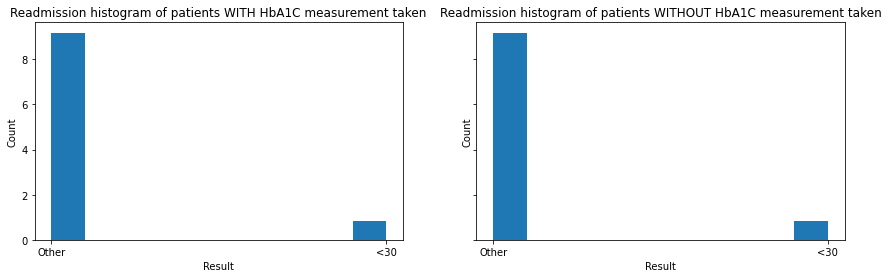

In [14]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].hist(yes_hba1c.readmitted, density=True)
ax[1].hist(no_hba1c.readmitted, density=True)
ax[0].set_title('Readmission histogram of patients WITH HbA1C measurement taken')
ax[1].set_title('Readmission histogram of patients WITHOUT HbA1C measurement taken')
for i in [0,1]:
    ax[i].set_xlabel('Result')
    ax[i].set_ylabel('Count')
plt.subplots_adjust(right=2);

We can see here that the readmission rates are slightly disproportionately higher among those patients who have not had an HbA1C measurement taken vs. those who have had this measurement taken.<br><br>**With measurement: 8.18%** readmitted *within 30 days.*<br>**Without measurement: 8.48%** readmitted *within 30 days.*<br><br>This is *roughly* in-line with the conclusions made by the aforementioned academic research article, which state that *\"With respect to readmission and taken as a whole without adjusting for covariates, measurement of HbA1c was associated with a significantly reduced rate of readmission"*

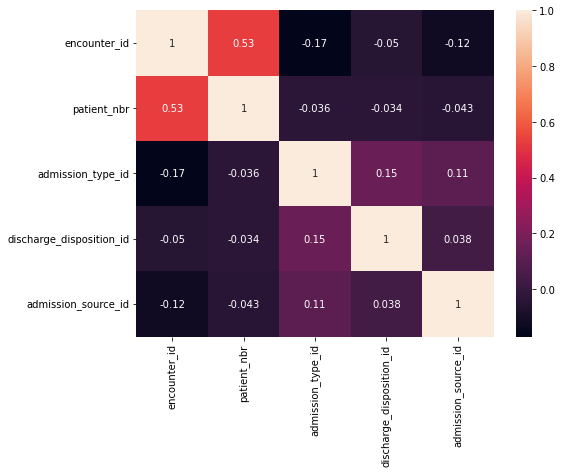

In [15]:
df1_cats_corr = df1_cats.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(df1_cats_corr, annot=True);

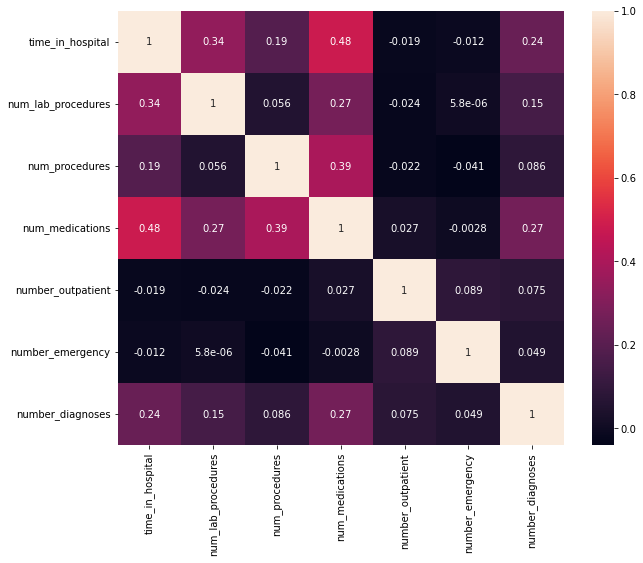

In [16]:
df1_numeric_corr = df1_numeric.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(df1_numeric_corr, annot=True);

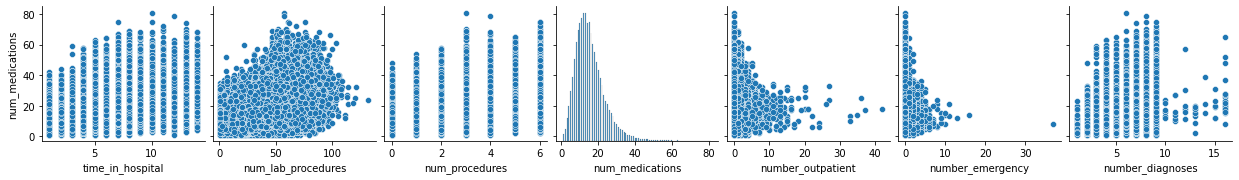

In [17]:
sns.pairplot(df1_numeric, y_vars=['num_medications']);

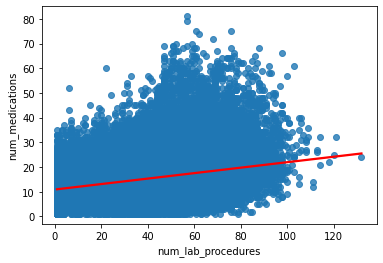

In [18]:
sns.regplot(x='num_lab_procedures',y='num_medications', data=df1_numeric, line_kws = {'color':'r'});

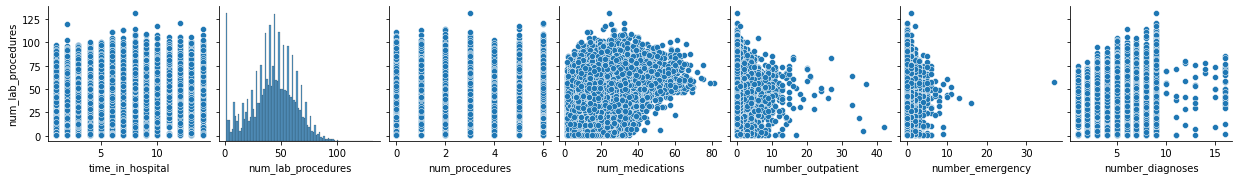

In [19]:
sns.pairplot(df1_numeric, y_vars=['num_lab_procedures']);

Further observations made in the df1.html pandas-profiling profile:<br>
- 'time_in_hospital' distribution is right-tailed, with a range of 1-14 (days) and a mean of 4.40.
- 'payer_code' contains 39.6% '?'s. -- This column is removed to avoid errors.
- 'medical_specialty' contains 49.1% '?'s. -- This column is kept, but imputed 'missing' for '?'.
- 'num_lab_procedures' has a fairly normal distribution, though 1 procedure is the most frequent at 3.2% frequency with 43 procedures at 2.8% as the second most-frequent. The distribution has a mean of 43.10 and a range of 1-132.
- 'num_procedures' distribution is right-tailed, with a 'bump' at the max value of 6.
- 'num_medications' distribution is right-tailed, with a range of 1-81 and mean of 16.02.
- 'diag_' columns contain a high number of ICD-9 codes starting with 428, 276, 427, 250, and 401.
- 'number_diagnoses' is particularly interesting, with 48.6% of values at 9, a range of 1-16, and a mean of 7.42.
- 'A1Cresult' is 83.3% 'None', meaning the vast majority of these encounters do not include the taking of an HbA1c measurement.
- 'examide' and 'citoglipton' medications were unchanged across the dataset and will therefore be dropped in our 'clean' dataset.
- 'insulin' contains 46.6% 'No', indicating ~47% of the encounters do not involve patients who are actively taking insulin.
- 'change' column contains 53.8% 'No', so a slight majority of these encounters involve patients whose diabetes medication is unchanged (dosage or generic name) afterwards.
- 'diabetesMed' column shows 77.0% of encounters involve a diabetes medication prescription.

In [20]:
df1.to_csv('clean_data2.csv', index=False)